10 variant

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

matplotlib.rcParams["figure.dpi"] = 800

In [2]:
files = ["lukoil.csv", "brent.csv", "copper.csv", "eurusd.csv", "gas.csv", "gold.csv", "sp500.csv", "usdrub.csv"]
dfs = (pd.read_csv(file)[["<DATE>", "<CLOSE>"]].rename(columns = {"<DATE>": f"{file[:-4]}Date", "<CLOSE>": file[:-4]})
       for file in files)
srs = [pd.Series(
    data=df[file[:-4]].values, index=pd.to_datetime(df[f"{file[:-4]}Date"], format="%Y%m%d"), name=file[:-4],
    dtype=np.float32) for file, df in zip(files, dfs)]
df = pd.concat(srs, axis=1, names=["date"])
df.dropna(how="any", inplace=True)
df.to_csv("Stocks.csv", sep=',')
df.head(10)

lukoil      brent       copper   eurusd    gas         gold  \
2019-02-22  5527.0  66.910004  6502.556152  1.13321  2.698  1330.699951   
2019-02-25  5533.0  64.919998  6483.816895  1.13613  2.848  1330.699951   
2019-02-26  5551.0  65.790001  6477.203125  1.13918  2.786  1329.500000   
2019-02-27  5580.0  66.470001  6494.839844  1.13710  2.800  1319.800049   
2019-02-28  5501.0  66.279999  6491.533203  1.13731  2.798  1312.900024   
2019-03-01  5500.5  65.000000  6450.747559  1.13644  2.846  1294.500000   
2019-03-04  5546.5  65.550003  6460.668457  1.13422  2.857  1289.199951   
2019-03-05  5622.5  65.570000  6459.565918  1.13077  2.883  1289.199951   
2019-03-06  5713.0  65.930000  6424.291992  1.13110  2.833  1284.900024   
2019-03-07  5677.0  66.089996  6392.324707  1.11812  2.868  1291.000000   

                  sp500     usdrub  
2019-02-22  2792.669922  65.350098  
2019-02-25  2796.110107  65.518600  
2019-02-26  2793.899902  65.696701  
2019-02-27  2792.379883  65.750198  
2019-02-28  2784.489990  65.915001  
2019-03-01  2803.689941  65.915497  
2019-03-04  2792.810059  65.762802  
2019-03-05  2789.649902  65.788002  
2019-03-06  2771.449951  65.947998  
2019-03-07  2748.929932  66.249001

In [3]:
df = df.div(df.shift(1)).apply(np.log)
df.dropna(how="any", inplace=True)
print(df)


              lukoil     brent    copper    eurusd       gas      gold  \
2019-02-25  0.001085 -0.030193 -0.002886  0.002574  0.054106  0.000000   
2019-02-26  0.003248  0.013312 -0.001021  0.002681 -0.022010 -0.000902   
2019-02-27  0.005211  0.010283  0.002719 -0.001828  0.005013 -0.007323   
2019-02-28 -0.014259 -0.002863 -0.000509  0.000185 -0.000714 -0.005242   
2019-03-01 -0.000091 -0.019501 -0.006303 -0.000765  0.017010 -0.014114   
...              ...       ...       ...       ...       ...       ...   
2021-02-12  0.020093  0.029945  0.005543 -0.000883  0.012155 -0.001041   
2021-02-16  0.019356  0.013463  0.007866 -0.002578  0.065789 -0.020652   
2021-02-17 -0.017187  0.020709  0.016962 -0.003597  0.052876 -0.005666   
2021-02-18 -0.026970 -0.021181  0.013517  0.003845 -0.081065 -0.003833   
2021-02-19  0.007275 -0.010920  0.029823  0.002140  0.024303  0.007035   

               sp500    usdrub  
2019-02-25  0.001231  0.002575  
2019-02-26 -0.000791  0.002715  
2019-02-27 -

In [4]:
y, x = df["lukoil"], df[[file[:-4] for file in files if file != "lukoil.csv"]]
x = sm.add_constant(x)
reg = sm.OLS(y, x)
results = reg.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 lukoil   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     27.64
Date:                Mon, 03 May 2021   Prob (F-statistic):           6.80e-32
Time:                        12:47:49   Log-Likelihood:                 1225.6
No. Observations:                 484   AIC:                            -2435.
Df Residuals:                     476   BIC:                            -2402.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.148      0.8

Для уровня значимости 0.05
p-value для статистики Фишера меньше уровня значимости, поэтому модель не вырожденная
p-value для гипотезы о равенстве нулю коэффициентов при предикторах медь, газ и константе превышают 5%, поэтому
уберем их из модели

In [5]:
exclude = {"lukoil.csv", "copper.csv", "gas.csv"}
x = df[[file[:-4] for file in files if file not in exclude]]
reg = sm.OLS(y, x)
results = reg.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 lukoil   R-squared (uncentered):                   0.286
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              38.32
Date:                Mon, 03 May 2021   Prob (F-statistic):                    4.38e-33
Time:                        12:47:51   Log-Likelihood:                          1224.5
No. Observations:                 484   AIC:                                     -2439.
Df Residuals:                     479   BIC:                                     -2418.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Для новой модели незначимым предиктором является sp500, уберем его

In [6]:
exclude |= {"sp500.csv"}
x = df[[file[:-4] for file in files if file not in exclude]]
reg = sm.OLS(y, x)
results = reg.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 lukoil   R-squared (uncentered):                   0.282
Model:                            OLS   Adj. R-squared (uncentered):              0.276
Method:                 Least Squares   F-statistic:                              47.15
Date:                Mon, 03 May 2021   Prob (F-statistic):                    1.98e-33
Time:                        12:47:52   Log-Likelihood:                          1223.2
No. Observations:                 484   AIC:                                     -2438.
Df Residuals:                     480   BIC:                                     -2422.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

проверим гипотезу о некоррелированности остатков с помощью статистики Дарбина-Уотсона

In [7]:
print(durbin_watson(results.resid))

2.0769267


Можно считать, что остатки некоррелированны

Посмотрим на гистограмму остатков

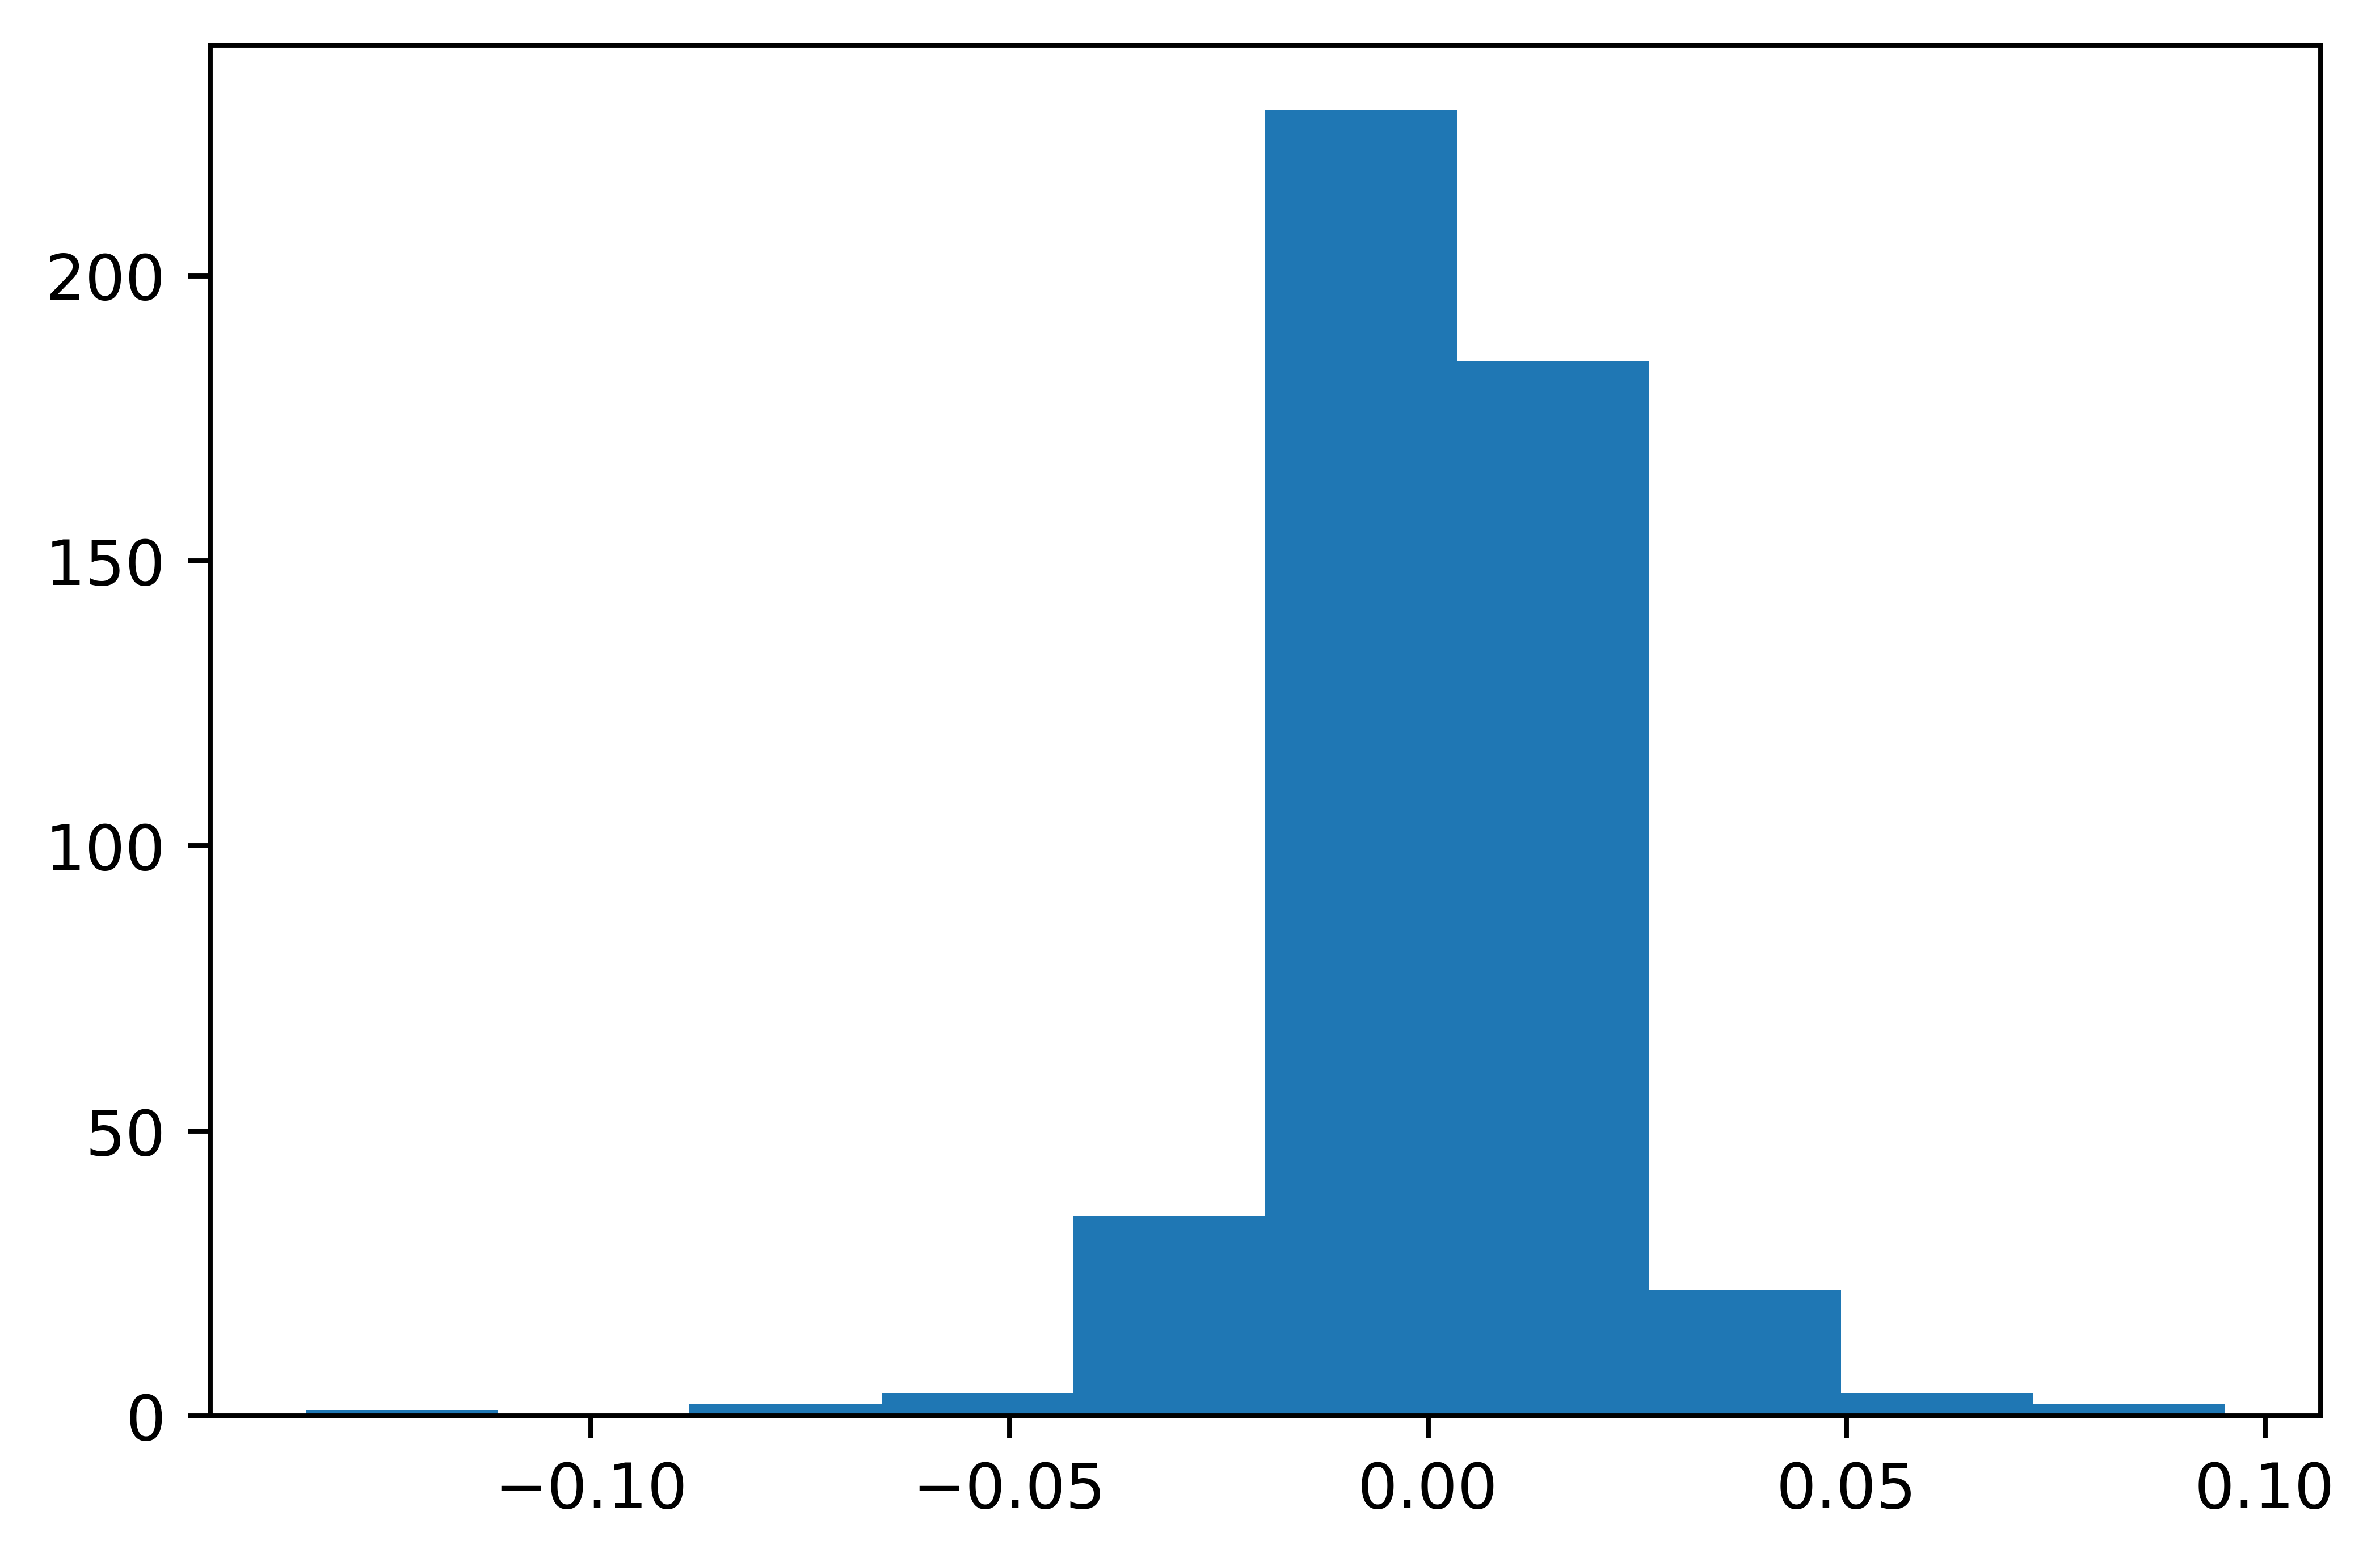

In [8]:
plt.hist(results.resid)
plt.show()

Распределение похоже на нормальное